# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa investe: TV, Jornal e Rádio.
- TV, Jornal e Rádio estão em milhares de reais.
- Vendas estão em milhões

# Biblioteca

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Carregamento de Dados

In [2]:
df = pd.read_csv("dataset/advertising.csv")
df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


- Observação: os valores da coluna vendas apesar de parecer que são menores que os investimentos, estão na escala de milhões.

# Tratamento dos Dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Análise Exploratória

In [4]:
# Correlação
df.corr()

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

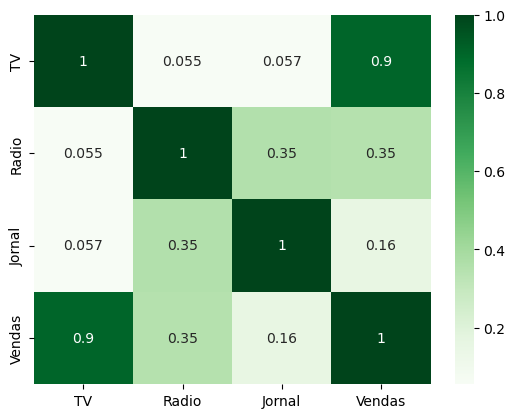

In [5]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

- Correlação alta entre a TV e Vendas, provavelmente quanto mais investimos em TV mais vendas são realizadas.

# Modelagem

In [6]:
# Separando os dados
x = df[['TV', 'Radio', 'Jornal']]
y = df['Vendas']

In [7]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

### Temos um problema de regressão - Vamos escolher o modelo que vamos usar:
- Regressão Linear
- Random Forest

In [8]:
# Modelos
model_linear = LinearRegression()
model_forest = RandomForestRegressor()

In [9]:
# Treinar Modelo
model_linear.fit(x_train, y_train)
model_forest.fit(x_train, y_train)

RandomForestRegressor()

In [10]:
# Previsão
y_pred_linear = model_linear.predict(x_test)
y_pred_forest = model_forest.predict(x_test)

# Avaliar Modelo

- Vamos calcular o R2

In [11]:
print(r2_score(y_test, y_pred_linear))
print(r2_score(y_test, y_pred_forest))

0.8651167784377882
0.9583798088486839


# Visualização Gráfica das Previsões

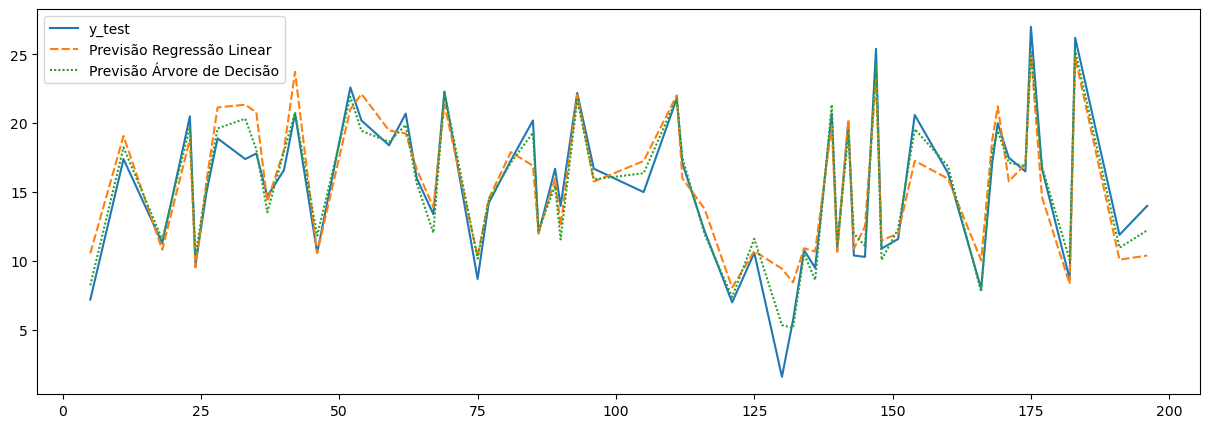

In [13]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_test'] = y_test
tabela_auxiliar['Previsão Regressão Linear'] = y_pred_linear
tabela_auxiliar['Previsão Árvore de Decisão'] = y_pred_forest

plt.figure(figsize=(15,5))
sns.lineplot(data=tabela_auxiliar)
plt.show()

# Nova Previsão

In [14]:
tabela_nova = pd.read_csv('dataset/novos.csv')
tabela_nova

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [18]:
# Calculando nova previsão
previsao = model_forest.predict(tabela_nova)
print(previsao)

[ 8.361  8.717 20.35 ]
